In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import random
import math
from datetime import datetime
from itertools import count
import pandas as pd
import gymnasium as gym

from IPython import display

import stockcore.data as scdata
import stockcore.models as scmodels
import stockcore.environment as scenv
import stockcore.utils as scutils

In [2]:
is_ipython = scutils.setup_mpl()
device = scutils.get_device()

if is_ipython:
    from tqdm.notebook import tqdm
else:
    from tqdm import tqdm

In [3]:
# read csv as pandas dataframe
btc_usd_df = pd.read_csv('btc_usd.csv')
eth_usd_df = pd.read_csv('eth_usd.csv')
print(btc_usd_df.shape)
print(eth_usd_df.shape)
print(btc_usd_df.head(5))
print(eth_usd_df.head(5))

(37305, 7)
(37305, 7)
                  date           unix     open     high      low    close  \
0  2020-08-18 07:00:00  1597734000000  12278.7  12289.3  12246.5  12284.4   
1  2020-08-18 08:00:00  1597737600000  12283.5  12306.1  12265.5  12265.8   
2  2020-08-18 09:00:00  1597741200000  12265.0  12273.9  12231.3  12235.2   
3  2020-08-18 10:00:00  1597744800000  12234.8  12313.2  12197.9  12295.4   
4  2020-08-18 11:00:00  1597748400000  12293.7  12298.8  12180.4  12189.4   

       volume  
0  167.048618  
1  148.145490  
2  155.735895  
3  206.575700  
4  210.599326  
                  date           unix    open    high     low   close  \
0  2020-08-18 07:00:00  1597734000000  430.00  435.00  410.00  430.30   
1  2020-08-18 08:00:00  1597737600000  430.27  431.79  430.27  430.80   
2  2020-08-18 09:00:00  1597741200000  430.86  431.13  428.71  429.35   
3  2020-08-18 10:00:00  1597744800000  429.75  432.69  428.59  431.90   
4  2020-08-18 11:00:00  1597748400000  432.09  432.89 

In [4]:
env = scenv.MultiStockTradingEnv(name= "BTC_ETH_USD", dfs=[btc_usd_df, eth_usd_df], trading_fees=0.01/100)

In [5]:

device = scutils.get_device()

# Load the model
policy_net = scmodels.NaiveDQN(env).to(device)
policy_net.load_state_dict(torch.load(
    "model.pth", weights_only=True, map_location=device))
policy_net.eval()

NaiveDQN(
  (layer1): Linear(in_features=10, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=3, bias=True)
)

In [6]:
# Test the model
state, info = env.reset()
state = torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0)
for t in tqdm(count(), total=env.get_dfs_length()):
    action = policy_net.act(state)
    observation, reward, terminated, truncated, _ = env.step(action.item())
    state = torch.tensor(
        observation,
        dtype=torch.float32, device=device).unsqueeze(0)
    if terminated or truncated:
        break
history_dqn = env.get_history()

  0%|          | 0/37138 [00:00<?, ?it/s]

Portfolio Return : 819.17%


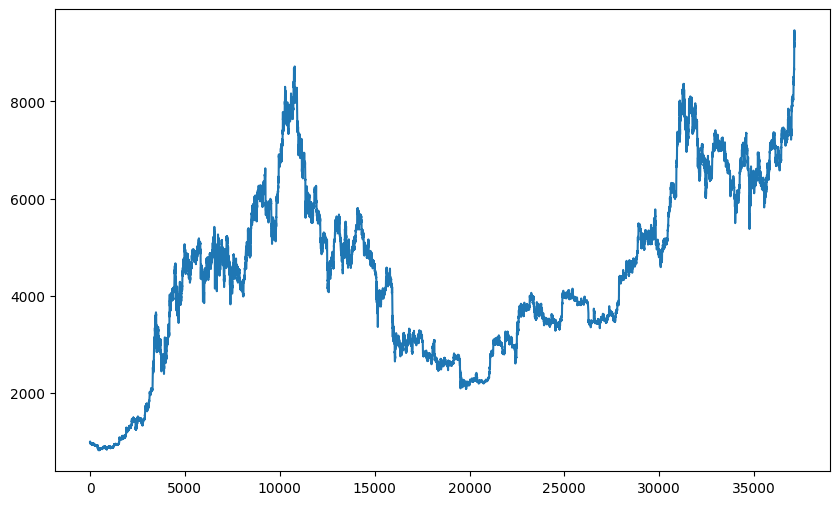

In [ ]:
# Plot the history
plt.figure(figsize=(10, 6))
plt.plot(history_dqn, label="DQN")
plt.show()